In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Зададим функции для расчета каждой энтропии

In [5]:
def RenyiEntropy(probability_dict, alpha, log_base = 2):
    res = 0
    probability_sum = np.sum(np.power(list(probability_dict.values()), alpha))
    res = 1 / (1 - alpha) * np.log2(probability_sum) / np.log2(log_base)
    return res

def ShannonEntropy(probability_dict):
    res = 0
    for key in probability_dict.keys():
        res -= probability_dict[key] * np.log2(probability_dict[key])
    return res

Загрузим и выведем данные

In [8]:
df = pd.read_excel('metricsgpu.xlsx').iloc[: , 1:]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0_-1914283016,1_1162298933,2_1699334155,3_1015470206,4_-1892436752,5_959950211,6_-1586769663,7_-210705507,8_1845374004,9_1371681631,...,18_-843376850,19_-2023652240,20_301413135,21_1015261171,22_514446745,23_-732263890,24_-54654581,25_182686738,26_-1525876703,27_-1332641818
1,0_-1914283016,1_1162298933,2_1699334155,3_1015470206,4_-1892436752,5_959950211,6_-1586769663,7_-210705507,8_1845374004,9_1371681631,...,18_-843376850,19_-2023652240,20_301413135,21_1015261171,22_514446745,23_-732263890,24_-54654581,25_182686738,26_-1525876703,27_-1332641818
2,0_-1914283016,1_1162298933,2_1699334155,3_1015470206,4_-1892436752,5_959950211,6_-1586769663,7_-210705507,8_1845374004,9_1371681631,...,18_-843376850,19_-2023652240,20_301413135,21_1015261171,22_514446745,23_-732263890,24_-54654581,25_182686738,26_-1525876703,27_-1332641818
3,0_1043910337,1_-1819823509,2_673241674,3_1015470206,4_-737339558,5_-1007587439,6_1402081169,7_877755983,8_1853920664,9_329923936,...,18_1744250831,19_940105059,20_-420420718,21_-979313803,22_-1883734994,23_1679102350,24_-2061161386,25_-1770915058,26_-1525876703,27_-598806369
4,0_1043910337,1_-1819823509,2_673241674,3_1015470206,4_-737339558,5_-1007587439,6_1402081169,7_877755983,8_1853920664,9_329923936,...,18_1744250831,19_940105059,20_-420420718,21_-979313803,22_-1883734994,23_1679102350,24_-2061161386,25_-1770915058,26_-1525876703,27_-598806369


Построим графики плотности распределения для каждой из колонок.  
Для этого в каждой колонке найдем все уникальные значения и заменим их на их числовые идентификаторы 

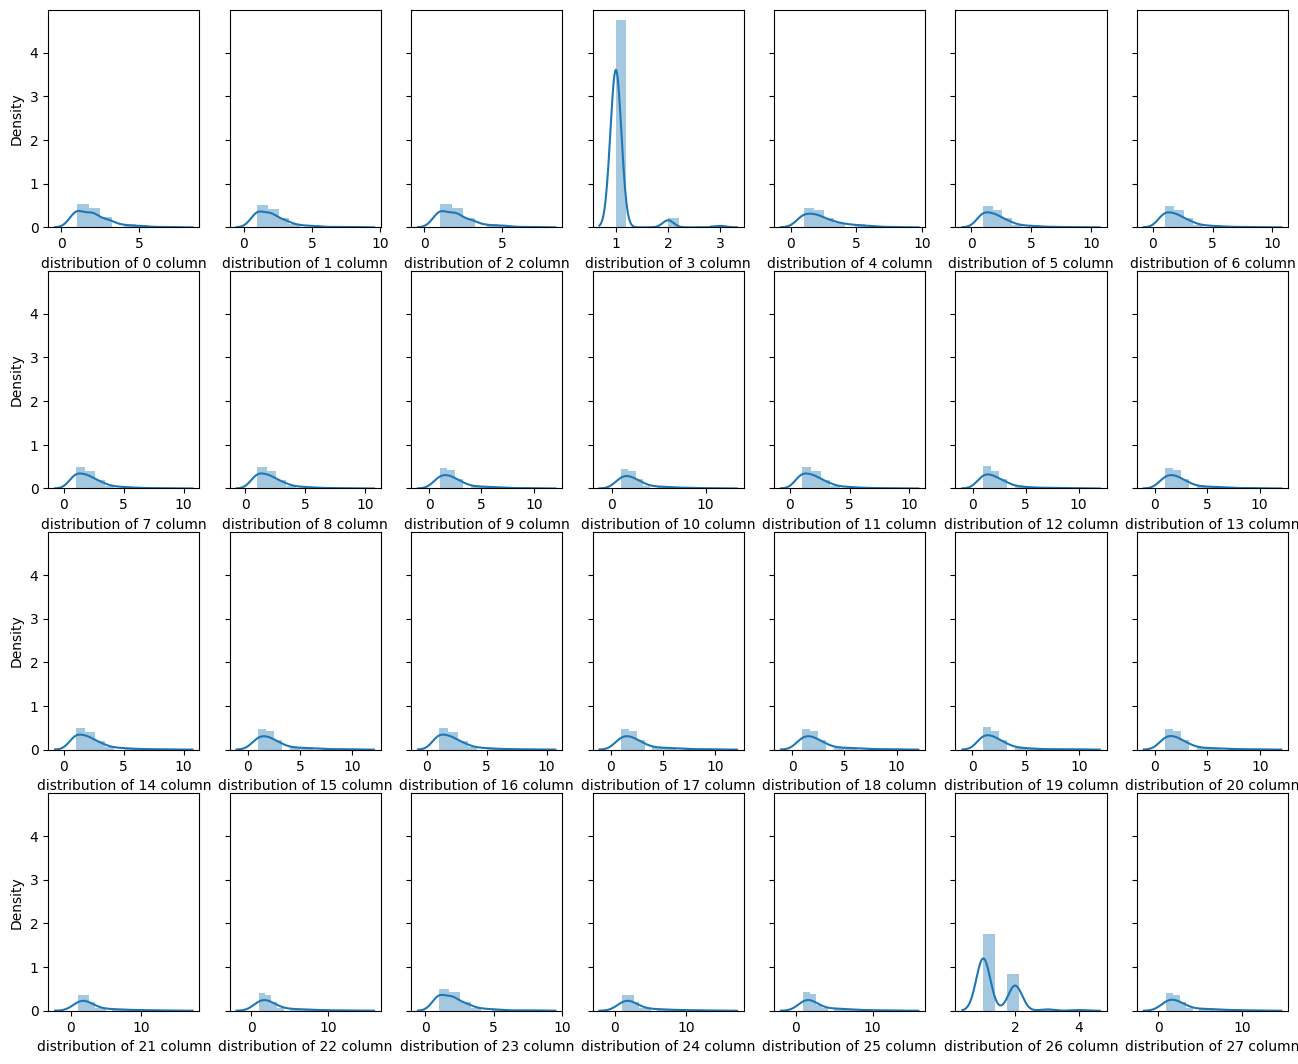

In [9]:
fig, axes = plt.subplots(4, 7, figsize=(16, 13), sharey=True)
for col, axs in zip(list(range(df.shape[1])), axes.flatten()):
    dt = dict(df.iloc[:, col].value_counts())
    keys = list(dt.keys())
    for i in range(1,len(keys)+1):
        dt[keys[i-1]] = i
    data = [dt[el] for el in df.iloc[:, col]]
    sns.distplot(data, ax=axs, axlabel="distribution of {} column".format(col))

Рассчитаем долю этого значения в столбце для получения аппроксимации вероятности выпадения того или иного значения

In [10]:
pb_dicts = []
for col in range(df.shape[1]):    
    probability_dict = dict(df.iloc[:, col].value_counts())
    for key in probability_dict.keys():
        probability_dict[key] = probability_dict[key]/df.shape[0]
    pb_dicts.append(probability_dict)
pb_dicts[0]

{'0_-1914283016': 0.39316239316239315,
 '0_1279320193': 0.3333333333333333,
 '0_-1855497760': 0.17094017094017094,
 '0_1043910337': 0.05128205128205128,
 '0_-1005918207': 0.03418803418803419,
 '0_1632377823': 0.008547008547008548,
 '0_1203722953': 0.008547008547008548}

Выведем значения энтропии Шэннона и Реньи

In [27]:
for probability_dict in pb_dicts:
    print(ShannonEntropy(probability_dict), RenyiEntropy(probability_dict = probability_dict, alpha = 0.9999))

1.9971777673071271 1.997220453194622
2.0461345121132735 2.0461845500899902
2.015282884126634 2.0153258174522546
0.32515273976033987 0.325193892844054
2.285457860130016 2.285500791728438
2.143407264312902 2.143464808394882
2.143407264312902 2.143464808394882
2.143407264312902 2.143464808394882
2.143407264312902 2.143464808394882
2.3384036516192643 2.338464627132687
2.4343427023474464 2.434409417991108
2.143407264312902 2.143464808394882
2.2393463150410846 2.2394108960850465
2.3384036516192643 2.338464627132687
2.143407264312902 2.143464808394882
2.3384036516192643 2.338464627132687
2.143407264312902 2.143464808394882
2.3384036516192643 2.338464627132687
2.3384036516192643 2.338464627132687
2.2028129108409984 2.202876103831676
2.3109843431326857 2.3110465858656424
2.7478973654827445 2.7479744888264195
2.651958314754562 2.652031783281068
2.0461345121132735 2.0461845500899902
2.7478973654827445 2.7479744888264195
2.6384250938783342 2.6385031547092095
1.0815413164912804 1.0815737214169334
2